# Proyecto 2 - Algoritmo del Vendedor Viajero


## <span style="color:blue">1. Pregunta de Investigación:</span>.

¿Cómo se compara el desempeño del algoritmo simulated annealing con el desempeño del algoritmo genético en la resolución del problema del vendedor viajero para 17 localidades en Costa Rica?

### <span style="color:blue">Problema:</span>.

El problema del vendedor viajero se trata de crear un algoritmo que busque la ruta más óptima entre una cantidad **"n"** de ciudades visitando cada ciudad exactamente una vez y finalizando la ruta en la ciudad donde comenzó. Para solucionar este problema combinacional se pueden utilizar numerosos diferentes tipos de algoritmos, sin embargo, para esta investigación se utilizarán dos tipos de algoritmos diferentes , el primero será un algoritmo de simulated annealing y el segundo un algoritmo genético.

### <span style="color:blue">Alcances y Delimitaciones:</span>.

El vendedor viajero es un problema NP-completo, lo cual nos indica que es signifactivamente difícil de resolver, el poder de computación requerido para trabajar este tipo de problemas combinatorios con fuerza bruta o inclusive métodos sistemáticos como el backtracking es sumamente alto. Los algoritmos probabilísticos como los que vamos a utilizar en esta investigación ofrecen una alternativa más accesible en relación al poder computacional requerido, sin embargo, esta ventaja no es de gratis ya que se sacrifica un poco en la calidad de la solución dada por el algoritmo, no obstante, es lo suficientemente buena.

El desarollo y refinamiento de algoritmos como estos nos permite realizar problemas sumamente complejos con menos recursos. 

### <span style="color:blue">Hipótesis:</span>.


*  Al realizar estudios sobre algoritmos metaheurísticos como lo son el simulated annealing (enfriamiento simulado en español) y algoritmos genéticos es importante generar un balance entre la intensidad de las búsquedas así como la diversificación que estas pueden tener, es decir, se debe encontrar un resultado con un equilibrio entre la cantidad de esfuerzo realizado para búsquedas locales y globales. Esto con el fin de encontrar regiones con soluciones favorables y no malgastar tiempo en regiones no tan prometedoras o ya exploradas. Estos algoritmos ofrecen una gran ventaja en términos de complejidad temporal, ya que brindan una solución suficientemente óptima, pero no la más óptima.


### <span style="color:blue">3. Metodología:</span>.


Para analizar estos diferentes algoritmos probabilísticos se realizaran pruebas empíricas mediante experimentos establecidos, estos van a consistir principalmente en el análisis de la complejidad temporal en relación a la calidad de la solución variando los parámetros de entrada en cada algoritmo. 

### <span style="color:blue">Diseño de experimentos</span>.


####  $\color{blue}{\text{→  Experimento 1:}}$

* El experimento 1 consiste en realizar una comparación entre la complejidad temporal y la calidad de soluciones encontradas por el algoritmo simulated annealing. Se clasificará la calidad de estas soluciones (excelentes, buenas, aceptables o malas). En este experimento se realizará una variación en la tasa de enfriamiento del algoritmo en un rango de 50-90 y avanzando de diez en diez se ejecutarán 5 corridas del algoritmo por cada valor. A continuación se muestran los parámetros relevantes para este experimento. Finalmente se probarán tres valores de temperatura; un valor alto, uno medio y otro bajo. 

    #####  Dominio

    ciudades_rutacsv = `datos/ciudades_cr.csv`

    ciudad_inicio = `Alajuela`

    #####  Simulated Anealing

    temperatura = `[10e8, 10e16, 10e258]`

    tasa_enfriamiento = `[0.50, 0.60, 0.70, 0.80, 0.90]`
    
    
####  $\color{blue}{\text{→  Experimento 2:}}$

* El experimento 2 consiste en variar los parámetros del algoritmo genético, esto lo vamos a hacer cambiando los valores del tamaño de población y la cantidad de repeticiones. Uno de los parámetros que influyen más en este algoritmo es el tamaño de la población y el número de repeticiones que se decidan utilizar; por esta razón vamos a probar el algoritmo con tres distintos tamaños de población especificados más adelante en conjunto con tres diferentes cantidades de repeticiones siguiendo el orden respectivo especificado a continuación.

    #####  Dominio

    ciudades_rutacsv = `datos/ciudades_cr.csv'

    ciudad_inicio = `Alajuela`

    #####  Algoritmo Genetico

    tam_poblacion = `[50, 300, 700]`

    porc_elite = `0.1`

    prob_mult = `0.5`

    reps = `[250, 1000, 3000]`

####  $\color{blue}{\text{→  Experimento 3:}}$

* El experimento 3 consiste en la comparación directa de la complejidad temporal y la calidad de la solución entre el algoritmo genético y el simulated annealing utilizando buenos parámetros encontrados en los experimentos anteriores. Este experimento es principalmente para contrastar las diferencias entre los dos algoritmos debido a que la escojencia de parámetros buenos puede variar mucho dependiendo del caso.

### <span style="color:blue">Especificaciones del equipo</span>.


Adicionalmente, como bien es sabido, existen una gran cantidad de factores que afectan el rendimiento de cada algoritmo, como lo es, por ejemplo, los recursos disponibles que tenga la máquina para el estudio, compilador e inclusive el lenguaje de programación de estos algoritmos. Es por ello que es importante detallar las especificaciones que estas tienen, y en este caso son las siguientes: 

    -Lenguaje de Programación: Python 3.  
    -Compilador: Jupyter Python.  
    -Procesador: Intel Core i7 de 4ta Generación.  
    -Sistema Operativo: Ubuntu Linux 18.04.5 LTS de 64 bits.  
    -Memoria RAM: 32 Gb.  


### <span style="color:blue">Representación:</span>


Para la graficación de los resultados vamos a utilizar la biblioteca matplotlib.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

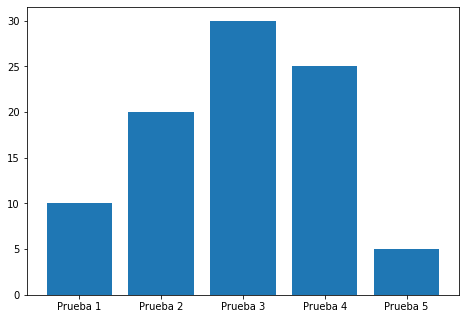

In [2]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Prueba 1', 'Prueba 2', 'Prueba 3', 'Prueba 4', 'Prueba 5']
students = [10,20,30,25,5]
ax.bar(langs,students)
plt.show()

El gráfico anterior solo es una representación no significativa de los gráficos y comparaciones que vamos a estar haciendo durante este análisis. 

## $\color{ForestGreen}{\text{▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀}}$
### $\color{ForestGreen}{\text{Algoritmos a Utilizar:}}$

A continuación se muestra al detalle los algoritmos que se van a utilizar para estas pruebas.


### $\color{ForestGreen}{\text{✰- Algoritmo Genético:}}$

In [9]:
import random as rand

def optimizar(dominio, tam_pobl, porc_elite, prob_mut, reps):
    """Algoritmo genetico para optimizacion estocoastica."""

    poblacion = dominio.generar_n(tam_pobl)
    
    while reps > 0:

        genomas = []
        for sol in poblacion:                       
            aptitud = dominio.fcosto(sol)
            genoma = (sol, aptitud)
            genomas.append(genoma)

        genomas.sort(key=lambda x: x[1])

        for i in range(len(genomas)):
            poblacion[i] = genomas[i][0]

        num_padres = int(len(poblacion) * porc_elite)
        num_hijos = int(len(poblacion) - num_padres)
        sig_gen = poblacion[0:num_padres]
        descendencia = []

        while num_hijos > 0:
            
            x = rand.randrange(0, len(sig_gen))
            y = rand.randrange(0, len(sig_gen))

            while x == y:

                x = rand.randrange(0, len(sig_gen))
                y = rand.randrange(0, len(sig_gen))

            padre_a = sig_gen[x]
            padre_b = sig_gen[y]

            hijo = dominio.cruzar(padre_a, padre_b)
            p = rand.uniform(0, 1)

            if p <= prob_mut:
                hijo = dominio.mutar(hijo)
            descendencia.append(hijo)
            num_hijos = num_hijos - 1

        
        sig_gen += descendencia
        poblacion = sig_gen
        reps = reps - 1

    return poblacion[0]

### $\color{ForestGreen}{\text{✰- Enfriamiento Simulado:}}$

In [13]:
import math
import random


def optimizar(dominio, temperatura = 10e32, tasa_enfriamiento = 0.95):
    """Algoritmo de optimizacion estocastica simulated annealing. """

    solucion = dominio.generar()                                    #genera una solucion al azar
    costo = dominio.fcosto(solucion)                                #se calcula el costo de dicha solucion
    
    while temperatura > 0.01:
        
        solucionP = dominio.vecino(solucion)                        #genera una solucion vecina al azar
        costoP = dominio.fcosto(solucionP)                          #se calcula el costo de la solucion vecina

        p = (math.exp(-(abs(costoP-costo))) ) / temperatura         #math.exp eleva E a la potencia indicada
                                                                    #abs = valor absoluto
        pAzar = random.uniform(0,1)                                 #random.uniform retorna un valor intermedio entre 0 y 1 
                                                                    #de distribucion uniforme
        
        if costoP<costo or pAzar<=p:
            solucion = solucionP
            costo = costoP
        
        temperatura= temperatura * tasa_enfriamiento
    
    return solucion

Antes de empezar con la reproducción de experimentos vamos a importar algunas funciones necesarias para ejecutar las pruebas y los algoritmos que vamos a usar:

In [1]:
from additional_functions import *

### <span style="color:blue">Reproducción de Experimentos:</span>

## $\color{blue}{\text{▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀}}$

### $\color{blue}{\text{Experimento #1:}}$


   #### Experimento 1.A (  TEMPERATURA = 10E8   ||    ENFRIAMIENTO = 0.50  )

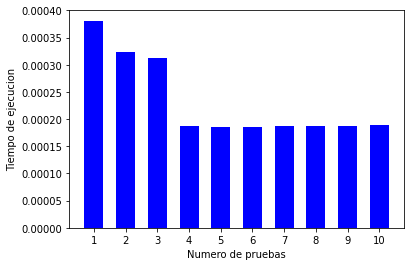

In [2]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e8, 0.50)
tiempo_sa_10e8_50 = resultado[0]
sol_sa_10e8_50 = resultado[1]

#### Experimento 1.B (  TEMPERATURA = 10E8   ||    ENFRIAMIENTO = 0.60  )

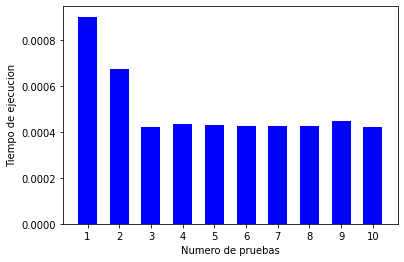

In [3]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e8, 0.60)
tiempo_sa_10e8_60 = resultado[0]
sol_sa_10e8_60 = resultado[1]

#### Experimento 1.C (  TEMPERATURA = 10E8   ||    ENFRIAMIENTO = 0.70  )

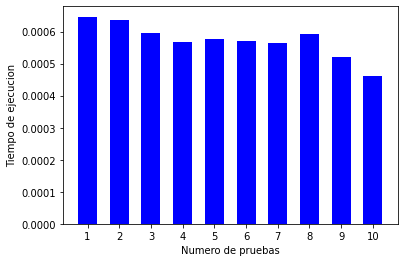

In [4]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e8, 0.70)
tiempo_sa_10e8_70 = resultado[0]
sol_sa_10e8_70 = resultado[1]

#### Experimento 1.D (  TEMPERATURA = 10E8   ||    ENFRIAMIENTO = 0.80  )

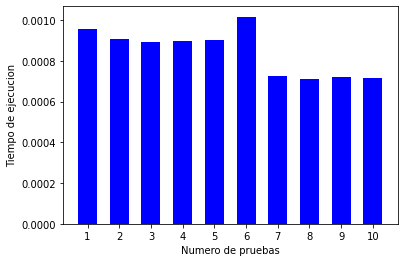

In [5]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e8, 0.80)
tiempo_sa_10e8_80 = resultado[0]
sol_sa_10e8_80 = resultado[1]

#### Experimento 1.E (  TEMPERATURA = 10E8   ||    ENFRIAMIENTO = 0.90  )

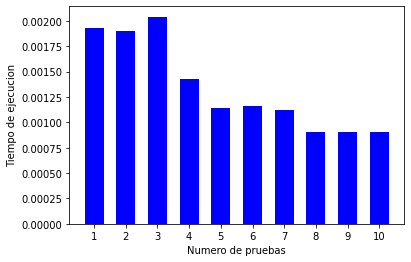

In [6]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e8, 0.90)
tiempo_sa_10e8_90 = resultado[0]
sol_sa_10e8_90 = resultado[1]

   ### Comparación de Resultados 1 (TEMPERATURA = 10e8)

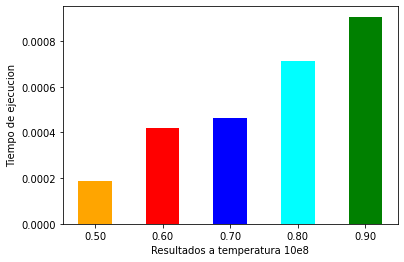

In [7]:
resultados_10e8 = [tiempo_sa_10e8_50, tiempo_sa_10e8_60, tiempo_sa_10e8_70, tiempo_sa_10e8_80, tiempo_sa_10e8_90]
comparar_resultados_tiempo(resultados_10e8, '10e8')

### Comparación de Resultados 2 (TEMPERATURA = 10e8)

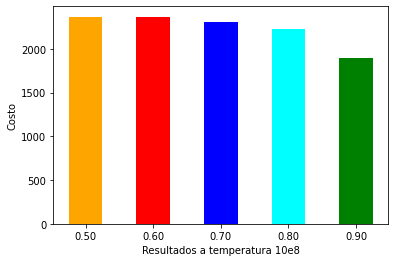

In [8]:
resultados = [sol_sa_10e8_50, sol_sa_10e8_60, sol_sa_10e8_70, sol_sa_10e8_80, sol_sa_10e8_90]
comparar_resultados_costo(resultados, '10e8')

#### Experimento 1.F (  TEMPERATURA = 10E16   ||    ENFRIAMIENTO = 0.50  )

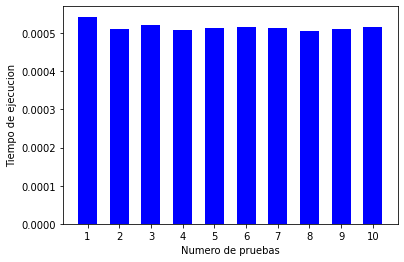

In [9]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e16, 0.50)
tiempo_sa_10e16_50 = resultado[0]
sol_sa_10e16_50 = resultado[1]

#### Experimento 1.G (  TEMPERATURA = 10E16   ||    ENFRIAMIENTO = 0.60  )

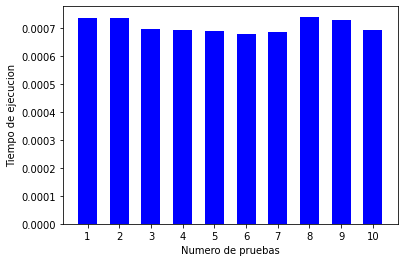

In [10]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e16, 0.60)
tiempo_sa_10e16_60 = resultado[0]
sol_sa_10e16_60 = resultado[1]

#### Experimento 1.H (  TEMPERATURA = 10E16   ||    ENFRIAMIENTO = 0.70  )

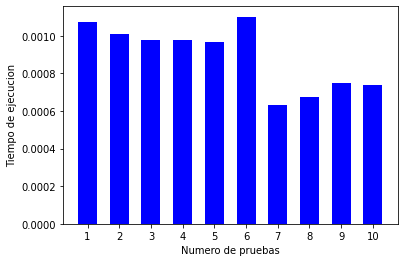

In [11]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e16, 0.70)
tiempo_sa_10e16_70 = resultado[0]
sol_sa_10e16_70 = resultado[1]

#### Experimento 1.I (  TEMPERATURA = 10E16   ||    ENFRIAMIENTO = 0.80  )

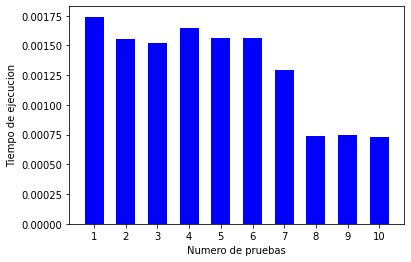

In [12]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e16, 0.80)
tiempo_sa_10e16_80 = resultado[0]
sol_sa_10e16_80 = resultado[1]

#### Experimento 1.J (  TEMPERATURA = 10E16   ||    ENFRIAMIENTO = 0.90  )

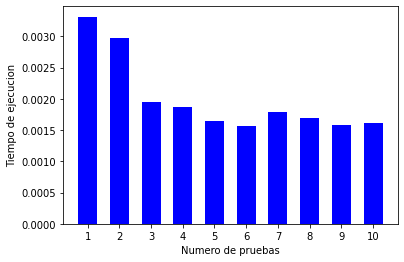

In [13]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e16, 0.90)
tiempo_sa_10e16_90 = resultado[0]
sol_sa_10e16_90 = resultado[1]

   ### Comparación de Resultados 3 (TEMPERATURA = 10e16)

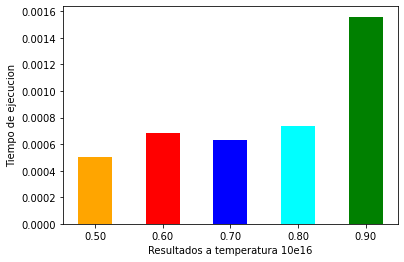

In [14]:
resultados_10e16 = [tiempo_sa_10e16_50, tiempo_sa_10e16_60, tiempo_sa_10e16_70, tiempo_sa_10e16_80, tiempo_sa_10e16_90]
comparar_resultados_tiempo(resultados_10e16, '10e16')

### Comparación de Resultados 4 (TEMPERATURA = 10e16)

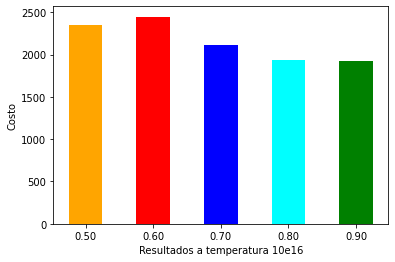

In [15]:
resultados = [sol_sa_10e16_50, sol_sa_10e16_60, sol_sa_10e16_70, sol_sa_10e16_80, sol_sa_10e16_90]
comparar_resultados_costo(resultados, '10e16')

#### Experimento 1.K (  TEMPERATURA = 10e258   ||    ENFRIAMIENTO = 0.50  )

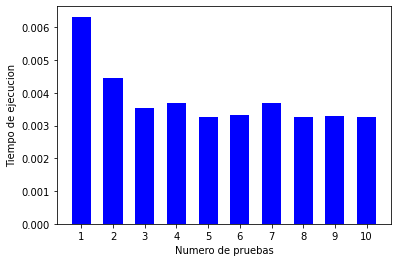

In [2]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e258, 0.50)
tiempo_sa_10e32_50 = resultado[0]
sol_sa_10e32_50 = resultado[1]

#### Experimento 1.L (  TEMPERATURA = 10e258   ||    ENFRIAMIENTO = 0.60  )

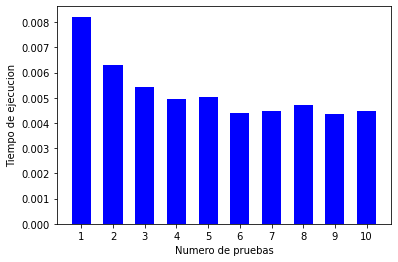

In [3]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e258, 0.60)
tiempo_sa_10e32_60 = resultado[0]
sol_sa_10e32_60 = resultado[1]

#### Experimento 1.M (  TEMPERATURA = 10e258   ||    ENFRIAMIENTO = 0.70  )

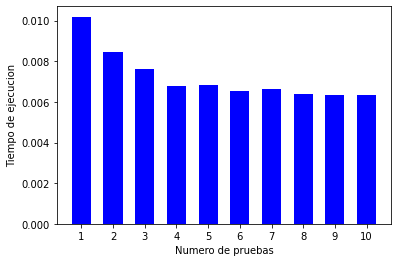

In [4]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e258, 0.70)
tiempo_sa_10e32_70 = resultado[0]
sol_sa_10e32_70 = resultado[1]

#### Experimento 1.N (  TEMPERATURA = 10e258   ||    ENFRIAMIENTO = 0.80  )

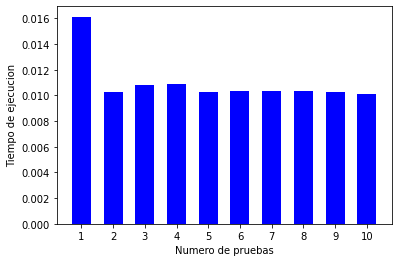

In [5]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e258, 0.80)
tiempo_sa_10e32_80 = resultado[0]
sol_sa_10e32_80 = resultado[1]

#### Experimento 1.O (  TEMPERATURA = 10e258   ||    ENFRIAMIENTO = 0.90  )

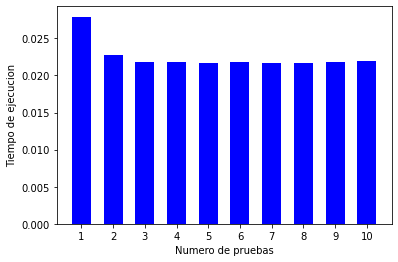

In [6]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e258, 0.90)
tiempo_sa_10e32_90 = resultado[0]
sol_sa_10e32_90 = resultado[1]

   ### Comparación de Resultados 5 (TEMPERATURA = 10e258)

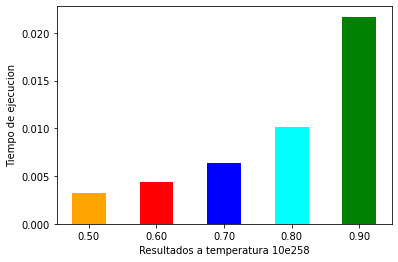

In [7]:
resultados_10e32 = [tiempo_sa_10e32_50, tiempo_sa_10e32_60, tiempo_sa_10e32_70, tiempo_sa_10e32_80, tiempo_sa_10e32_90]
comparar_resultados_tiempo(resultados_10e32, '10e258')

### Comparación de Resultados 6 (TEMPERATURA = 10e258)

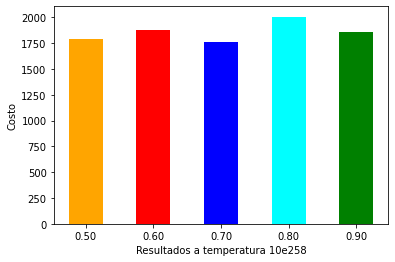

In [8]:
resultados = [sol_sa_10e32_50, sol_sa_10e32_60, sol_sa_10e32_70, sol_sa_10e32_80, sol_sa_10e32_90]
comparar_resultados_costo(resultados, '10e258')

## $\color{blue}{\text{▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀}}$

### $\color{blue}{\text{Experimento #2:}}$

### Experimento 2.A (tam_pob = 50, reps = 250)

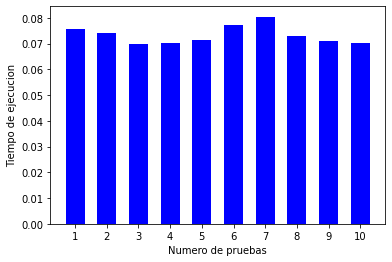

In [23]:
resultados = calcular_tiempos_ag('Alajuela', 50, 0.1, 0.5,250 )
tiempo_ag_50_250 = resultados[0]
sol_ag_50_250 = resultados[1]

### Experimento 2.B (tam_pob = 300, reps = 250)

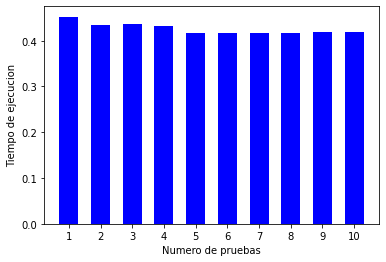

In [24]:
resultados = calcular_tiempos_ag('Alajuela', 300, 0.1, 0.5,250 )
tiempo_ag_300_250 = resultados[0]
sol_ag_300_250 = resultados[1]

### Experimento 2.C (tam_pob = 700, reps = 250)

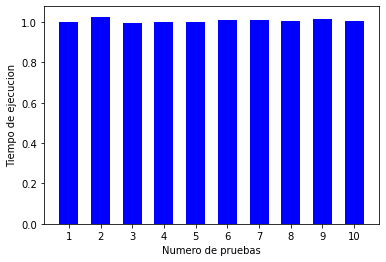

In [25]:
resultados = calcular_tiempos_ag('Alajuela', 700, 0.1, 0.5,250 )
tiempo_ag_700_250 = resultados[0]
sol_ag_700_250 = resultados[1]

### Comparación de Resultados 7 (reps = 250)

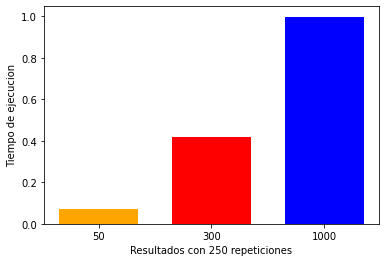

In [26]:
resultados_250_reps = [tiempo_ag_50_250, tiempo_ag_300_250, tiempo_ag_700_250]
comparar_resultados_tiempo_ag(resultados_250_reps, '250')

### Comparación de Resultados 8 (reps = 250)

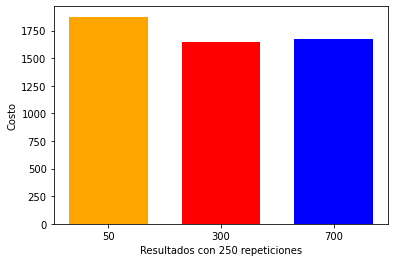

In [27]:
resultados_sol_250_reps = [sol_ag_50_250, sol_ag_300_250,sol_ag_700_250]
comparar_resultados_costo_ag(resultados_sol_250_reps, '250')

### Experimento 2.D (tam_pob = 50, reps = 1000)

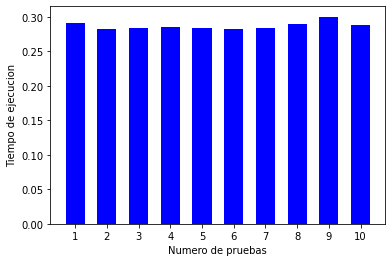

In [28]:
resultados = calcular_tiempos_ag('Alajuela', 50, 0.1, 0.5,1000)
tiempo_ag_50_1000 = resultados[0]
sol_ag_50_1000 = resultados[1]

### Experimento 2.E (tam_pob = 300, reps = 1000)

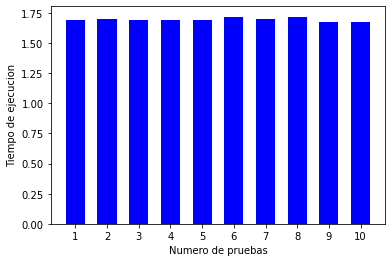

In [29]:
resultados = calcular_tiempos_ag('Alajuela', 300, 0.1, 0.5,1000)
tiempo_ag_300_1000 = resultados[0]
sol_ag_300_1000 = resultados[1]

### Experimento 2.F (tam_pob = 700, reps = 1000)

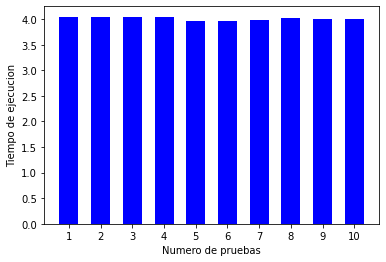

In [30]:
resultados = calcular_tiempos_ag('Alajuela', 700, 0.1, 0.5,1000)
tiempo_ag_700_1000 = resultados[0]
sol_ag_700_1000 = resultados[1]

### Comparación de Resultados 9 (reps = 1000)

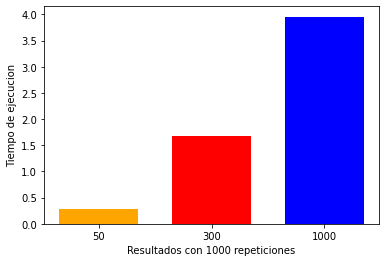

In [31]:
resultados_1000_reps = [tiempo_ag_50_1000, tiempo_ag_300_1000, tiempo_ag_700_1000]
comparar_resultados_tiempo_ag(resultados_1000_reps, '1000')

### Comparación de Resultados 10 (reps = 1000)

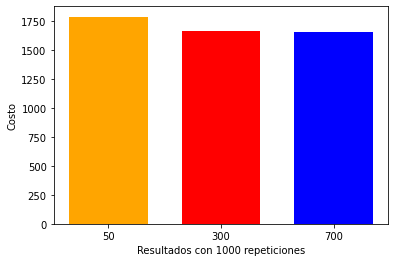

In [32]:
resultados_sol_1000_reps = [sol_ag_50_1000, sol_ag_300_1000,sol_ag_700_1000]
comparar_resultados_costo_ag(resultados_sol_1000_reps, '1000')

### Experimento 2.G (tam_pob = 50, reps = 3000)

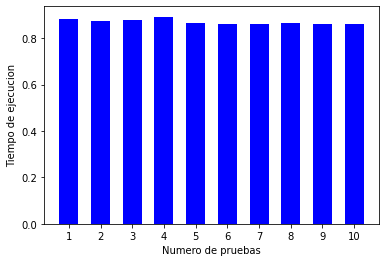

In [33]:
resultados = calcular_tiempos_ag('Alajuela', 50, 0.1, 0.5,3000)
tiempo_ag_50_3000 = resultados[0]
sol_ag_50_3000 = resultados[1]

### Experimento 2.H (tam_pob = 300, reps = 3000)

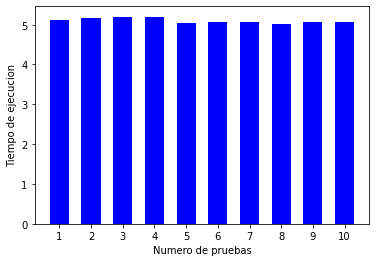

In [34]:
resultados = calcular_tiempos_ag('Alajuela', 300, 0.1, 0.5,3000)
tiempo_ag_300_3000 = resultados[0]
sol_ag_300_3000 = resultados[1]

### Experimento 2.I (tam_pob = 700, reps = 3000)

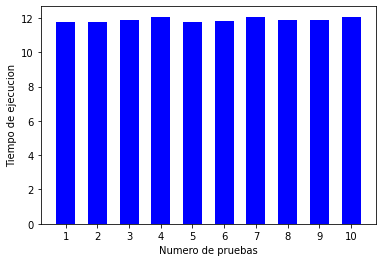

In [35]:
resultados = calcular_tiempos_ag('Alajuela', 700, 0.1, 0.5,3000)
tiempo_ag_700_3000 = resultados[0]
sol_ag_700_3000 = resultados[1]

### Comparación de Resultados 11 (reps = 3000)

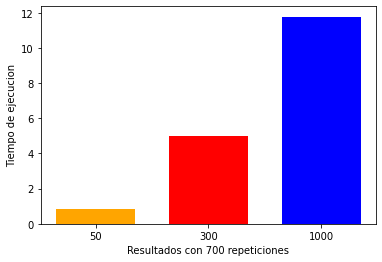

In [42]:
resultados_3000_reps = [tiempo_ag_50_3000, tiempo_ag_300_3000, tiempo_ag_700_3000]
comparar_resultados_tiempo_ag(resultados_3000_reps, '700')

### Comparación de Resultados 12 (reps = 3000)

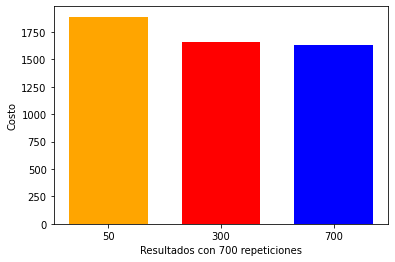

In [43]:
resultados_sol_3000_reps = [sol_ag_50_3000, sol_ag_300_3000,sol_ag_700_3000]
comparar_resultados_costo_ag(resultados_sol_3000_reps, '700')

## $\color{blue}{\text{▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀}}$
### $\color{blue}{\text{Experimento #3:}}$

#### Simulated Annealing

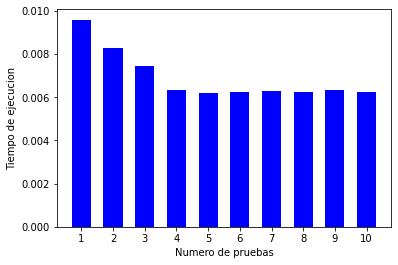

In [9]:
simulated_anealing_a = calcular_tiempos_sa(10, 'Alajuela', 10e258, 0.7)
tiempo_sa_a = simulated_anealing_a[0]
sol_sa_a = simulated_anealing_a[1]

#### Genetic Algorithm

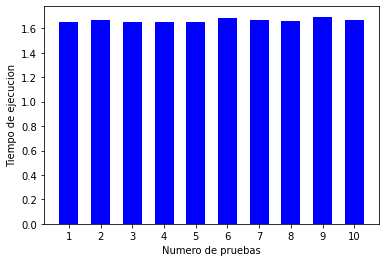

In [16]:
genetic_algorithm_a = calcular_tiempos_ag('Alajuela', 300, 0.1, 0.5, 1000)
tiempo_ag_a = genetic_algorithm_a[0]
sol_ag_a = genetic_algorithm_a[1]

#### Comparación de tiempos

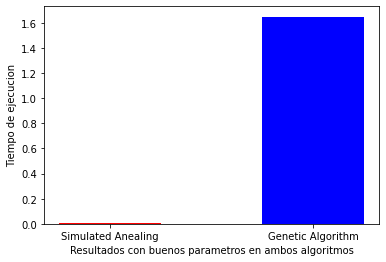

In [17]:
comparar_tiempo_algoritmos(tiempo_sa_a, tiempo_ag_a)

#### Comparación de costos

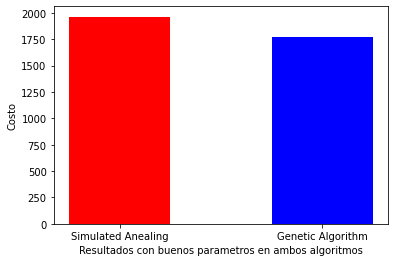

In [18]:
comparar_costo_algoritmos(sol_sa_a, sol_ag_a, 'Alajuela')

### $\color{blue}{\text{ 4. Análisis de Resultados:}}$

#### Experimento 1
*   En este experimento vemos resultados interesantes, en cuanto a complejidad temporal el agoritmo arrojó buenos resultados probando con todas las tasas de enfriamiento, especialmente cuando la tasa de enfriamiento fue de 50% con la temperatura siendo 10e8, sin embargo, el costo fue elevado.
    
    Como se observa en los gráficos, en las tres temperaturas ocurrió algo interesante ya que la complejidad temporal fue la mejor siempre que la tasa de enfriamiento fue de 50%, sin embargo también fue la de mayor costo en las temperaturas 10e18 y 10e258.
    
    Por otra parte, en las tres temperaturas y con la tasa de enfriamiento de 90% siempre se obtuvo el peor resultado en cuanto a complejidad temporal, pero por lo contrario se obtuvo el menor costo.

    Después de realizar las pruebas analizamos que los mejores parámetros son: temperatura de 10e258 y tasa de enfriamiento de 70, esto porque en ese caso es donde encontramos que presenta una buena relacion entre la complejidad temporal y el costo, a diferencia de otros parámetros donde reflejan un costo muy elevado y un buen rendimiento temporal o también un costo bajo pero un muy mal rendimiento temporal, es decir en otros parámetros hay que sacrificar una de las dos cosas para tener buen resultado en la otra.

#### Experimento 2

*    Los resultados empíricos reflejan datos curiosos e interesantes, podemos ver que cuando la cantidad de población es de 50 se presenta la mejor complejidad temporal, no obstante, el costo es muy elevado. Por otro lado cuando el tamaño de la población es de 700 la complejidad temporal es la peor, sin embargo, el costo es el mejor. 

     La configuración de parámetros recomendada varía mucho dependiendo de cual sea la prioridad y qué resultado estemos buscando, si nos interesa tener un buen rendimiento temporal los parámetros recomendados son: tamaño_poblacion=50, porcentaje_elite=0.1, probabilidad_mutacion=0.5,iteraciones=250. Si lo que buscamos es el menor costo posible los parámetros recomendados son: tamaño_poblacion=300, porcentaje_elite=0.1, probabilidad_mutacion=0.5,iteraciones=1000.

#### Experimento 3 

*     En este experimento queríamos comparar las pruebas, el principal objetivo es identificar cual algoritmo es mejor en tiempo de duración y también en cuanto a costo. En cuanto a la comparación en tiempo, el simulated annealing muestra una gran diferencia con respecto al algoritmo genético, siendo el simulated el de mejor complejidad temporal.
*     En costo el algoritmo genético nos da mejores soluciones que el simulated, sin embargo la diferencia no es abismal.



### $\color{blue}{\text{ 5. Conclusiones:}}$

*    Los resultados empíricos nos demuestran que tanto el simulated como el algoritmo genético son eficientes a su manera, el simulated annealing refleja un mejor rendimiento temporal, por otra parte, el algoritmo genético es más eficiente en cuanto al costo, en buscar la ruta más corta.



*    En términos generales cada algoritmo es eficiente a su manera y en cierta parte para saber cual usar debemos tener claro si lo que buscamos es un buen rendimiento temporal o un menor costo.



* Simulated annealing puede dar muy buenos resultados a una complejidad temporal muy baja si encuentra el maximo global empezando el algoritmo con una tasa de enfriamiento y temperatura baja, sin embargo, el algoritmo se degrada mucho cuando las primeras soluciones son mas aproximadas al maximo local y no al global.



* Ambos algoritmos se pueden optimizar manipulando los parámetros de entrada para obtener mejores resultados, no obstante, las posibilidades de combinaciones son muchas  y la escogencia de los parámetros de entrada tambien dependen mucho de cada caso en específico.


* El algoritmo Simulated annealing con una temperatura muy alta comienza a degradarse significativamente en complejidad temporal y la calidad de la solución no mejora abismalmente.